In [6]:
import numpy as np
import math
from scipy.stats import gamma, uniform, loggamma
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
file = 'data.xlsx'
data = pd.read_excel(file).replace(',','.', regex=True)
data_np = np.array(data).astype(float)

In [105]:
def ln_gamma(theta, lamda, nu):
    dens_ln_gamma = (lamda-1)*np.log(theta) - theta*nu
    return dens_ln_gamma

In [112]:
def mcmc(y, iterar, sigma, lamda_alpha, lamda_beta, nu_alpha, nu_beta):
    
    # 1. Número de observaciones
    n = len(y)
    
    # 2. Suma de observaciones y suma del ln de las observaciones
    suma_y = sum(y)
    suma_ln_y = sum(np.log(y))
    
    # 3. Tabla de muestras: alpha - beta
    param = np.zeros((iterar, 2))
    
    # 4. Valores iniciales
    alpha_cur = 1
    beta_cur = 1
    param[0,0] = alpha_cur
    param[0,1] = beta_cur
    
    # 5. MCMC
    for i in range(iterar):
        
        # 6. Actualizar alpha: método MH
        
        # Nuevo valor propuesto de alfa: caminata gaussiana
        alpha_can = np.random.normal(alpha_cur, sigma)
        
        if alpha_can > 0:
            
            # ln de la verosimilitud
            ln_lik_alpha_cur = n*alpha_cur*np.log(beta_cur) - n*loggamma.rvs(alpha_cur) + (alpha_cur-1)*suma_ln_y
            ln_lik_alpha_can = n*alpha_cur*np.log(beta_cur) - n*loggamma.rvs(alpha_cur) + (alpha_cur-1)*suma_ln_y
            
            # ln de las distribuciones previas (priors)
            ln_prior_alpha_cur = ln_gamma(alpha_cur, lamda_alpha, nu_alpha)
            ln_prior_alpha_can = ln_gamma(alpha_can, lamda_alpha, nu_alpha)
            
            #ln de la distribución posterior
            ln_pi_cur = ln_lik_alpha_cur + ln_prior_alpha_cur
            ln_pi_can = ln_lik_alpha_can + ln_prior_alpha_can
            
            # M-H ratio
            # draw from a U(0,1)
            u = np.random.uniform(1)
            
            if np.log(u) < ln_pi_can - ln_pi_cur:
                alpha_cur = alpha_can        
        
        # 7. Actualiza beta: método Gibbs (probabilidad condicional)    
        beta_cur = gamma.rvs(alpha_cur*n + lamda_beta, scale = 1/(suma_y + nu_beta))
    
        # 8. Guarda las muestras
        param[i,0] = alpha_cur
        param[i,1] = beta_cur
    
    return param

[[1.         0.49353197]
 [1.41311784 0.70882915]
 [1.68007705 0.84036232]
 ...
 [4.81749085 2.34741851]
 [4.86842505 2.45140565]
 [4.93334147 2.46917362]]


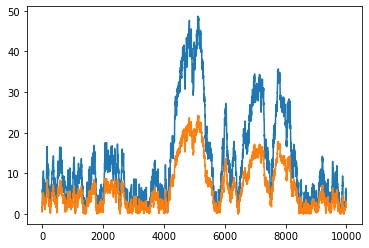

In [116]:
parametros_sim = mcmc(y = data_np, iterar = 10000, sigma = 1, lamda_alpha = 1, lamda_beta = 1, nu_alpha = 0.001, nu_beta = 0.001)

print(parametros_sim)

# trace plots to ensure that the chains mix well
plt.plot(parametros_sim[:,0])
plt.plot(parametros_sim[:,1])

(array([270., 235., 235., 282., 296., 342., 285., 315., 326., 280., 305.,
        297., 248., 241., 223., 209., 189., 193., 210., 203., 206., 220.,
        186., 154., 166., 194., 187., 147., 160., 118., 139., 133., 110.,
        130.,  63.,  62.,  57.,  67.,  63.,  47.,  41.,  35.,  38.,  40.,
         29.,  27.,  42.,  38.,  39.,  38.,  49.,  48.,  42.,  77.,  59.,
         71.,  67.,  74.,  47.,  64.,  71.,  68.,  38.,  60.,  52.,  30.,
         47.,  48.,  58.,  40.,  26.,  25.,  33.,  34.,  29.,  43.,  20.,
         27.,  34.,  26.,  32.,  25.,  41.,  38.,  33.,  46.,  23.,  18.,
         20.,  25.,  19.,  24.,  26.,  14.,   5.,   6.,   9.,  14.,   7.,
          8.]),
 array([3.37092783e-03, 2.45839298e-01, 4.88307668e-01, 7.30776038e-01,
        9.73244408e-01, 1.21571278e+00, 1.45818115e+00, 1.70064952e+00,
        1.94311789e+00, 2.18558626e+00, 2.42805463e+00, 2.67052300e+00,
        2.91299137e+00, 3.15545974e+00, 3.39792811e+00, 3.64039648e+00,
        3.88286485e+00, 4.1253

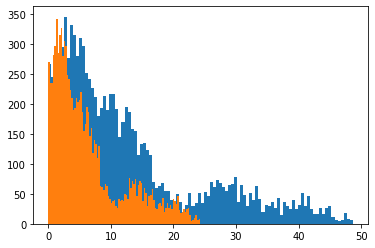

In [125]:
#draw histograms
plt.hist(parametros_sim[:,0], bins=100, density= False)
plt.hist(parametros_sim[:,1], bins=100, density= False)